# Brenda Eldridge 
<b>
IS 685<br/>
Final Project
</b>


# Data Collection

I will be analyzing the giving data from the University of Nevada, Reno Foundation. The giving data is for indivudals only, organizations and foundations have been excluded. The data will be for cash gifts, pledges, gift in kinds, etc. have been excluded from the dataset. I have limited the giving data for the past 5 full years - 2013 to 2017. The giving data is summarize by monthly giving, by donor.

<b>Import Libraries<b/>

In [934]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
spacer = '=========================================================================================='

#  Clean and Exploratory Data Analysis
    - Basic data exploration
    - Handle Missing values: 
        Gender - we have unknown as a gender type
        Age - we are missing ages on some donor records
    - Check datatypes
    - Drop Columns that are not going to be used


In [935]:
gifts = pd.read_csv('C:\gifts.csv')
gifts_all = pd.read_csv('C:\gifts.csv')

In [936]:
print('Gifts Head' + spacer)
print(gifts.head())
print('Gifts Stats' + spacer)
print(gifts.describe())
print('Gift Rows & Columns' + spacer)
print(gifts.shape)
print('Gift Data Types' + spacer)
print(gifts.head())
print(gifts.dtypes)

Gifts Head==========================================================================================
   RID  Gender  NevadaResident  Alumni  Age  GiftYear  GiftMonth  GiftCount  \
0   19  Female               1       1   53      2014         10          1   
1   20    Male               1       0   52      2015          7          1   
2   32    Male               0       1   55      2014         11          1   
3   46    Male               1       1   52      2013          6          1   
4   46    Male               1       1   52      2014          5          1   

    GiftDate  MonthlyGift  
0  10/1/2014        100.0  
1   7/1/2015       2200.0  
2  11/1/2014         50.0  
3   6/1/2013         25.0  
4   5/1/2014         50.0  
Gifts Stats==========================================================================================
                 RID  NevadaResident         Alumni            Age  \
count  115003.000000   115003.000000  115003.000000  115003.000000   
mean   255818.

In [937]:
#Change datatypes
gifts['Gender'] = gifts['Gender'].astype('category')
gifts['NevadaResident'] = gifts['NevadaResident'].astype('category')
gifts['Alumni'] = gifts['Alumni'].astype('category')                                              
gifts['GiftDate']= gifts['GiftDate'].astype('datetime64')
gifts['Age'] = gifts['Age'].astype('int64')  
print(gifts.dtypes)

RID                        int64
Gender                  category
NevadaResident          category
Alumni                  category
Age                        int64
GiftYear                   int64
GiftMonth                  int64
GiftCount                  int64
GiftDate          datetime64[ns]
MonthlyGift              float64
dtype: object


In [938]:
gifts.groupby(['Gender']).size()

Gender
Female     55574
Male       59226
Unknown      203
dtype: int64

In [939]:
gifts.drop(['GiftMonth'], axis=1,inplace = True)
gifts.drop(['GiftYear'], axis=1,inplace = True)
gifts.drop(['GiftDate'], axis=1, inplace=True)
print(gifts.shape)

(115003, 7)


<b>Since we have less than 1% of missing gender data - I will delete the 203 records with unknown gender.</b>
    

In [940]:
gifts= gifts.drop(gifts[gifts.Gender == 'Unknown'].index)
print(gifts.groupby(['Gender']).size())

Gender
Female     55574
Male       59226
Unknown        0
dtype: int64


In [941]:
# determine the number of records with missing age
print('Records with missing age' + spacer )
print(gifts[gifts['Age'] ==0].groupby(['Gender'])['Age'].count())

Records with missing age==========================================================================================
Gender
Female     30219
Male       29593
Unknown        0
Name: Age, dtype: int64


In [942]:
print("Gender Mean" + spacer)
print(gifts[gifts['Age'] !=0].groupby(['Gender'])['Age'].mean())
print("Gender Median" + spacer)
print(gifts[gifts['Age'] !=0].groupby(['Gender'])['Age'].median())



Gender Mean==========================================================================================
Gender
Female     54.894616
Male       57.390612
Unknown          NaN
Name: Age, dtype: float64
Gender Median==========================================================================================
Gender
Female     56.0
Male       59.0
Unknown     NaN
Name: Age, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021082A23BE0>,
      dtype=object)

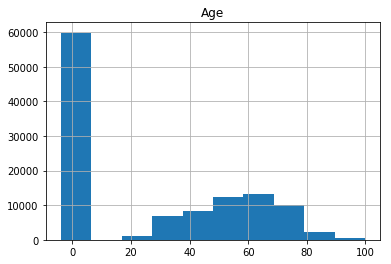

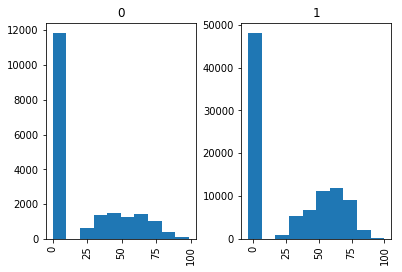

In [943]:
gifts.hist(column='Age')
gifts.hist(column='Age', by='NevadaResident')

<b>We have some data quality issues with Age as well a significant number of missing values - 60,011 about 50%.  So I will use the median values of the ages by gender. There are also some ages on the negative and lower bound so I will delete ages < 18.
<b/>

In [944]:
print(gifts['Age'].min())
gifts= gifts.drop(gifts[gifts.Age < 18].index)
print(gifts['Age'].min())


-4
20


In [945]:
#Female Age missing value
Female_median = gifts.loc[(gifts['Age'] != 0) & (gifts['Gender'] == 'Female') ,'Age'].median()
print (Female_median)
gifts.loc[(gifts['Age'] == 0) & (gifts['Gender'] == 'Female') ,'Age'] = Female_median
print(gifts.loc[(gifts['Age'] == 0) & (gifts['Gender']=='Female')]) # Code Check

#Male Age missing value
Male_median = gifts.loc[(gifts['Age'] != 0) & (gifts['Gender'] == 'Male') ,'Age'].median()
print (Male_median)
gifts.loc[(gifts['Age'] == 0) & (gifts['Gender'] == 'Male') ,'Age'] = Male_median
print(gifts.loc[(gifts['Age'] == 0) & (gifts['Gender']=='Male')]) # Code Check

#Unknowns
#Unknown Age missing value
UKMedian = round((Female_median + Male_median)/2)
Unknown_median = gifts.loc[(gifts['Age'] != 0) & (gifts['Gender'] == 'Unknown') ,'Age'] = UKMedian
print (Unknown_median)
gifts.loc[(gifts['Age'] == 0) & (gifts['Gender'] == 'Unknown') ,'Age'] = Unknown_median
print(gifts.loc[(gifts['Age'] == 0) & (gifts['Gender']=='Unknown')]) # Code Check

print('Gifts Stats' + spacer)
print(gifts.describe())

56.0
Empty DataFrame
Columns: [RID, Gender, NevadaResident, Alumni, Age, GiftCount, MonthlyGift]
Index: []
59.0
Empty DataFrame
Columns: [RID, Gender, NevadaResident, Alumni, Age, GiftCount, MonthlyGift]
Index: []
58
Empty DataFrame
Columns: [RID, Gender, NevadaResident, Alumni, Age, GiftCount, MonthlyGift]
Index: []
Gifts Stats==========================================================================================
                 RID           Age     GiftCount   MonthlyGift
count   54971.000000  54971.000000  54971.000000  5.497100e+04
mean   184963.278929     56.258336      1.186498  8.010196e+02
std    147319.400282     15.333868      0.529226  2.023940e+04
min        19.000000     20.000000      1.000000  1.000000e-02
25%     55934.000000     44.000000      1.000000  1.500000e+01
50%    159844.000000     58.000000      1.000000  5.000000e+01
75%    301210.000000     68.000000      1.000000  2.030000e+02
max    572291.000000    100.000000     18.000000  2.097800e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002107DABD9B0>]],
      dtype=object)

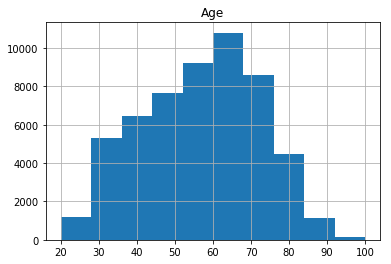

In [946]:
#Histogram
gifts.hist(column='Age')

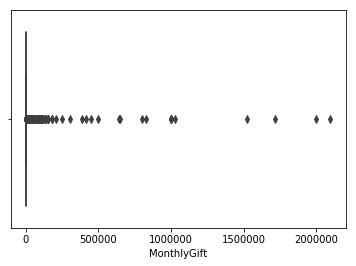

In [947]:
sns.boxplot(x=gifts['MonthlyGift'])


In [948]:
#Get a count of the outlier to be deleted
print(gifts.shape)
tg = len(gifts[gifts['MonthlyGift'] >100000]) 
print('Count of Gifts over 100K to be deleted:')
print(tg)
               

(54971, 7)
Count of Gifts over 100K to be deleted:
40


<b>There are 40 gifts over 100K - I will remove those outliers. <b/>

(54931, 7)


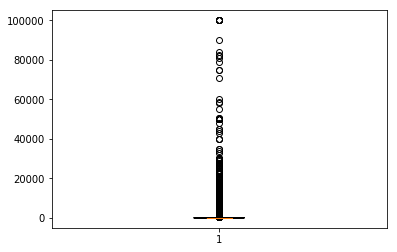

In [949]:
gifts= gifts.drop(gifts[gifts.MonthlyGift >100000].index)
print(gifts.shape)
MG = plt.boxplot(gifts['MonthlyGift'],1)
plt.show(MG)

Text(0,0.5,'Frequency')

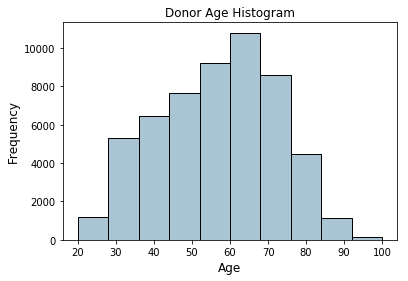

In [950]:
fig, ax = plt.subplots()
gifts['Age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Donor Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

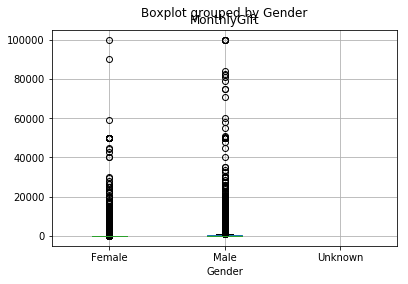

In [951]:
gifts.boxplot(by='Gender', column='MonthlyGift')

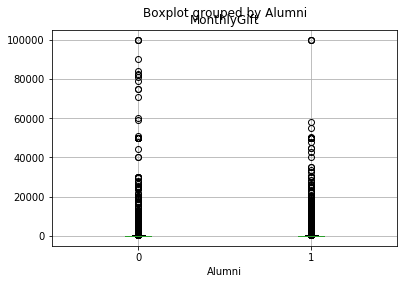

In [952]:
gifts.boxplot(by='Alumni', column='MonthlyGift')

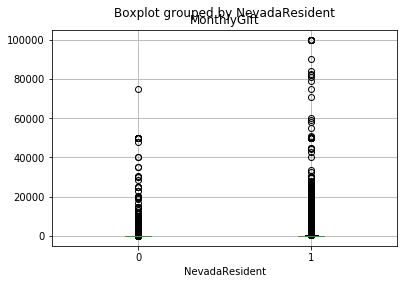

In [953]:
gifts.boxplot(by='NevadaResident', column='MonthlyGift')

In [954]:
print("Gender Mean" + spacer)
print(gifts.groupby(['Gender'])['Age'].mean())
print("Gender Median" + spacer)
print(gifts.groupby(['Gender'])['Age'].median())
print("Gender Standard Deviation" + spacer)
print(gifts.groupby(['Gender'])['Age'].std())


Gender Mean==========================================================================================
Gender
Female     54.923921
Male       57.377542
Unknown          NaN
Name: Age, dtype: float64
Gender Median==========================================================================================
Gender
Female     56.0
Male       59.0
Unknown     NaN
Name: Age, dtype: float64
Gender Standard Deviation==========================================================================================
Gender
Female     15.041793
Male       15.482519
Unknown          NaN
Name: Age, dtype: float64


In [955]:
print("Gender Mean" + spacer)
print(gifts.groupby(['Gender'])['MonthlyGift'].mean())
print("Gender Median" + spacer)
print(gifts.groupby(['Gender'])['MonthlyGift'].median())
print("Gender Standard Deviation" + spacer)
print(gifts.groupby(['Gender'])['MonthlyGift'].std())


Gender Mean==========================================================================================
Gender
Female     260.942747
Male       574.842082
Unknown           NaN
Name: MonthlyGift, dtype: float64
Gender Median==========================================================================================
Gender
Female     29.0
Male       85.0
Unknown     NaN
Name: MonthlyGift, dtype: float64
Gender Standard Deviation==========================================================================================
Gender
Female     1867.014849
Male       2753.589106
Unknown            NaN
Name: MonthlyGift, dtype: float64


In [956]:
print("Nevada Resident Mean" + spacer)
print(gifts.groupby(['NevadaResident'])['MonthlyGift'].mean())
print("Nevada Resident Median" + spacer)
print(gifts.groupby(['NevadaResident'])['MonthlyGift'].median())
print("Nevada Resident Standard Deviation" + spacer)
print(gifts.groupby(['NevadaResident'])['MonthlyGift'].std())

Nevada Resident Mean==========================================================================================
NevadaResident
0    395.993665
1    435.647537
Name: MonthlyGift, dtype: float64
Nevada Resident Median==========================================================================================
NevadaResident
0    50.0
1    50.0
Name: MonthlyGift, dtype: float64
Nevada Resident Standard Deviation==========================================================================================
NevadaResident
0    2580.564580
1    2358.923615
Name: MonthlyGift, dtype: float64


In [957]:
print("Alumni Mean" + spacer)
print(gifts.groupby(['Alumni'])['MonthlyGift'].mean())
print("Alumni Median" + spacer)
print(gifts.groupby(['Alumni'])['MonthlyGift'].median())
print("Alumni Standard Deviation" + spacer)
print(gifts.groupby(['Alumni'])['MonthlyGift'].std())

Alumni Mean==========================================================================================
Alumni
0    477.481902
1    405.331978
Name: MonthlyGift, dtype: float64
Alumni Median==========================================================================================
Alumni
0    35.0
1    50.0
Name: MonthlyGift, dtype: float64
Alumni Standard Deviation==========================================================================================
Alumni
0    3019.957351
1    1984.297083
Name: MonthlyGift, dtype: float64


# Data Analysis Summary: 

At first glance, I realized that I had some data anomalies.  I had a mean age of 26, which was due to several missing values.  After further analysis, I determined that we had over 50% of the data with the age equal to zero.  I determined that there was a difference in mean ages among males and females, so I decided to handle the missing values by calculating the age mean by gender and applying those.  Then I got a nice age distribution. I had a mean of 55 for females and 57 for males with a standard deviation of ~15 for both genders.

I analyzed the mean monthly gift by gender and the males had an average of \$315 more than females.  On average males had a monthly gift amount of \$575 and females \$261, however the standard deviation for males was
much higher than females with males at \$2,755 and females at \$1,870.

Nevada residents had a slightly higher mean monthly gift over non-residents.  Although I thought this to be true, I was actually surprise because I lumped everything into the non-resident including both USA and international gifts.  The average Nevada resident gift was \$435 and the non-resident was \$395 and the standard deviations were close at \$2,358 and \$2,580 respectively.

Surprisingly, Alumni average monthly gift amount was less than non-alumni, although slightly.  The average monthly gift for an Alumni was \$405 and non-alumni was \$477.  The non-alumni had a greater standard deviation at \$3,019 compared to Alumni at \$1,984

Next, I looked at the annual gift distributions by gender.  I had 40 significant outliers that could skew my analysis, so I deleted the annual gifts over 100K.  At this point I was satisfied with the results, however I may want to go back and delete the gifts in the 75K -100K range.

I also analyzed the monthly gift distribution and noticed that I had a few outlier and so I decided to delete the 40 gifts that were over \$100K.  That still left me with some outiers in the \$80-\$100K, but I decided to move forward with my analysis.

I want to be able to predict annual donation amount base on gender, age, alumni status, and Nevada residency. 


# Hypothesis  

<b>Null Hypothesis:</b> No difference in the average annual gifts amounts in a population based on Age, Gender, Nevada Residence, and Alumnus Status.

<b>Alternate Hypothesis:</b> There is a difference in the average annual gift amounts in a population based on Age, Gender, Nevada Residence, and Alumnus Status.

H<sub>0</sub> = Age, Gender, Nevada Residence, Alumni Status = 0

H<sub>1</sub> = Age, Gender, Nevada Residence, Alumni Status ≠ 0

Reject H<sub>0</sub> if p < α 
where α = .05


# Hyphothesis Test, Feature Engineering, and Model Selection


In [958]:

x = np.array(gifts['Age'])
y = np.array(gifts['MonthlyGift'])

r,p = pearsonr(x,y)

print( "r", r)

print ("p", p)


r 0.11439568061303455
p 2.2523892745581968e-159


In [959]:
gifts['intGender'] = np.where(gifts['Gender']=='Male', 0, 1)
x = np.array(gifts['intGender'])
y = np.array(gifts['MonthlyGift'])

r,p = pearsonr(x,y)

print( "r", r)

print ("p", p)


r -0.06543876587924435
p 3.3698476622761694e-53


In [960]:
x = np.array(gifts['Alumni'])
y = np.array(gifts['MonthlyGift'])

r,p = pearsonr(x,y)

print( "r", r)

print ("p", p)


r -0.014326825600317297
p 0.0007852961070739414


In [961]:
x = np.array(gifts['NevadaResident'])
y = np.array(gifts['MonthlyGift'])

r,p = pearsonr(x,y)

print( "r", r)

print ("p", p)


r 0.005751986854226686
p 0.17762798030136526


# Features

I will be implementing a supervised machine learning algorithm and will be training to predict montly gift amounts.  Since my predictor variable is continuous, regressional analysis was select.  I wanted to look at the following 4 features: 
<li>Age: I selected age with the assumption that the older you are the more net worth you have and are able to donate at a hight amount. </li>
<li>Gender: I selected gender with the assumption (maybe stereotypically) that males are higher earners and therefore could donate at a higher monthly amount. </li>
<li>Alumni:  I selected Alumni with the assumption that an alumnus would have a higher rate of affiliation with the University and therefore more likely to donate. </li>
<li>Nevada Resident: I selected Nevada resident with the assumption that proximity to the University would have a higher rate of affiliation and therefore more likely to donate.</li>


# Machine Learning Implementation


In [962]:
g = gifts
g.head()
gifts.drop(['Gender'], axis=1,inplace = True)
g.drop('RID', axis=1, inplace=True)
g.drop('GiftCount', axis=1, inplace = True)
g.drop('intGender', axis=1, inplace = True)
X = g.drop('MonthlyGift', axis=1).values
y = g['MonthlyGift'].values
print(X)
gifts.head()

[[1 1 53.0]
 [1 0 52.0]
 [0 1 55.0]
 ...
 [1 0 57.0]
 [1 0 57.0]
 [1 0 57.0]]


,NevadaResident,Alumni,Age,MonthlyGift
0,1,1,53.0,100.0
1,1,0,52.0,2200.0
2,0,1,55.0,50.0
3,1,1,52.0,25.0
4,1,1,52.0,50.0


In [963]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_predict = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.01208769272649479

In [964]:
#KFold
regCV = linear_model.LinearRegression()
cv_results = cross_val_score(regCV, X,y, cv=5)
print(cv_results)
np.mean(cv_results)


[ 0.00651889  0.00274362 -0.0005498  -0.00315487  0.00768586]


0.002648740523063564

In [965]:
#Ridge - 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42)
ridge = Ridge(alpha=.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.011970520704751908

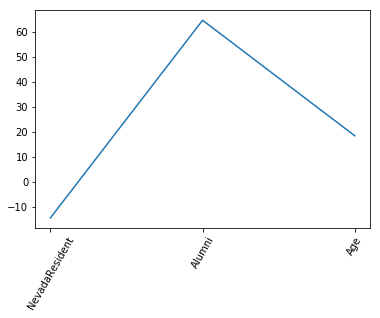

In [966]:
#Lasso
names = gifts.drop('MonthlyGift', axis = 1).columns
lasso = Lasso(alpha = .1)
lasso_coef = lasso.fit(X,y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel = ('Coefficients')
plt.show()

In [967]:

gifts_all.drop('GiftDate', axis=1, inplace = True)
gifts_all.drop('Gender', axis=1, inplace = True)
g2013 = gifts_all[gifts_all['GiftYear']==2013]
g2017 = gifts_all[gifts_all['GiftYear']==2017]


g2013.head()

,RID,NevadaResident,Alumni,Age,GiftYear,GiftMonth,GiftCount,MonthlyGift
3,46,1,1,52,2013,6,1,25.0
9,48,1,1,54,2013,12,1,50.0
15,101,1,1,51,2013,4,1,125.0
37,167,1,1,52,2013,2,2,50.0
38,188,1,1,64,2013,4,1,250.0


In [968]:
X1 = g2013.drop('MonthlyGift', axis=1).values
y1 = g2013['MonthlyGift'].values


X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size = .3, random_state = 42)
ridge = Ridge(alpha=.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.002015653506341253

In [969]:
X1 = g2017.drop('MonthlyGift', axis=1).values
y1 = g2017['MonthlyGift'].values


X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size = .3, random_state = 42)
ridge = Ridge(alpha=.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.0022795577334996375

# Summary

The project was challenging and enlightening.  I was actually surprised that my model dismally failed! I thought that those would be ideal feature to predict monthly donations.  Obviously, I would completely trash this model and start from scratch think that maybe I should have further reduce the monthly gift outlier down to the 50K range.  Maybe that would have given me better results.  With the dismal results, I don’t think that it would be cost effective to pursue this model, although I think that another model is worth pursuing.  Prior to pursuing I would do more industry research to see what others have found that are good features to evaluate in a donation model.  

I would accept the null hypothesis as the combination of the features were not statistically significant.  However, the only feature that was not statistically significant was Nevada resident with a p-value of 0.18, all the other p-values were zero.  So, that being said maybe I would drop the Nevada resident and train the model again.

I was genuinely surprised that the alumni giving was less than non-alumni and the spread was quite large.  The average giving amount was close, but alumni gave less on average.  But the spread for non-alumni was over $1,000 more than alumni.
The Lasso regressing indicated that Alumni was a strong feature, however it was strong in the wrong direction that I had anticipated. I could not get the gender feature to properly work on the Lasso regression, even when I converted to integer.  But I will further test that as see if that’s a strong feature as well. 

The k-fold test failed even more than the standard regression analysis, once again proving that this model need to be complete re-worked as previously discussed.  The Ridge regression show a little more promise but still severely lacking at only 1\%\! But I guess you have to failure your first ML to start the learning process.

I was also intrigued that males continue to outpace females in with a higher donation amount.  Not that I was shocked, but I had hoped that it would not be true.  I would like to further investigate and compare the difference say from this analysis compared to say 1990 to 1995 and see if the gap is closing.  

In closing, I think that this project provided students with real world experience and tools that will be useful in the job market.  I think that I need to do some additional ML work, before I fully understand and can competently design, but it was a good introductory course in ML.


